<a href="https://colab.research.google.com/github/afedryandi/VAR-Model-Bitcoin/blob/main/Python_VAR_Model_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
path_dataset = '/content/Python VAR Model - Data Historis Bitcoin.xlsx'
df = pd.read_excel(path_dataset)
df.head()

,Tanggal,Terakhir,Pembukaan
0,2022-01-01,47738,46217
1,2022-01-02,47311,47738
2,2022-01-03,46430,47293
3,2022-01-04,45837,46435
4,2022-01-05,43425,45833


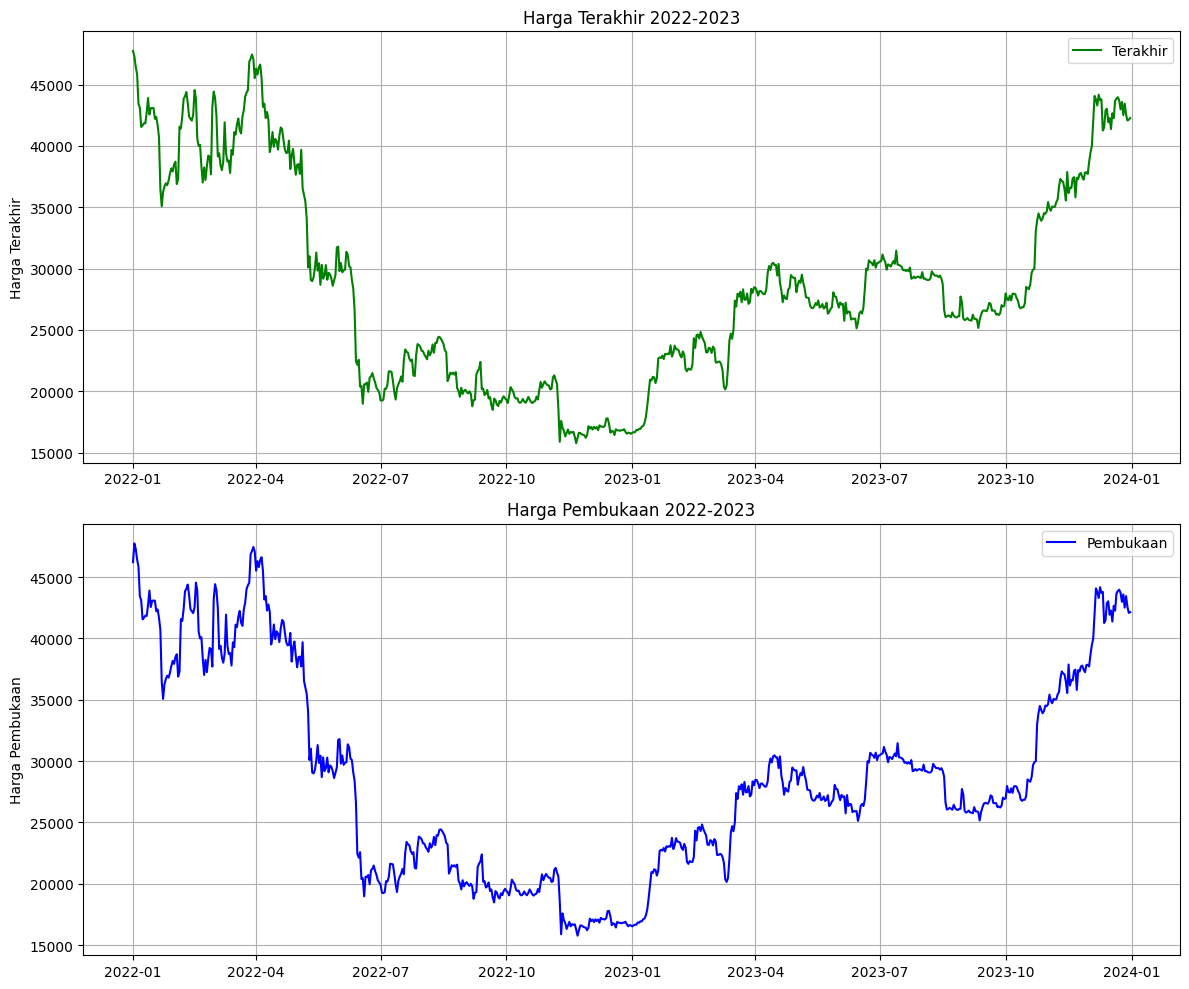

In [3]:
plt.figure(figsize=(12,10))

plt.subplot(2, 1, 1)
plt.title('Harga Terakhir 2022-2023')
plt.grid(True)
plt.ylabel('Harga Terakhir')
plt.plot(df['Tanggal'], df['Terakhir'], 'green', label='Terakhir')
plt.legend()

plt.subplot(2, 1, 2)
plt.title('Harga Pembukaan 2022-2023')
plt.grid(True)
plt.ylabel('Harga Pembukaan')
plt.plot(df['Tanggal'], df['Pembukaan'], 'blue', label='Pembukaan')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
to_row = int(len(df)*0.9)
training_data = df[0:to_row][['Terakhir', 'Pembukaan']]
testing_data = df[to_row:][['Terakhir', 'Pembukaan']]

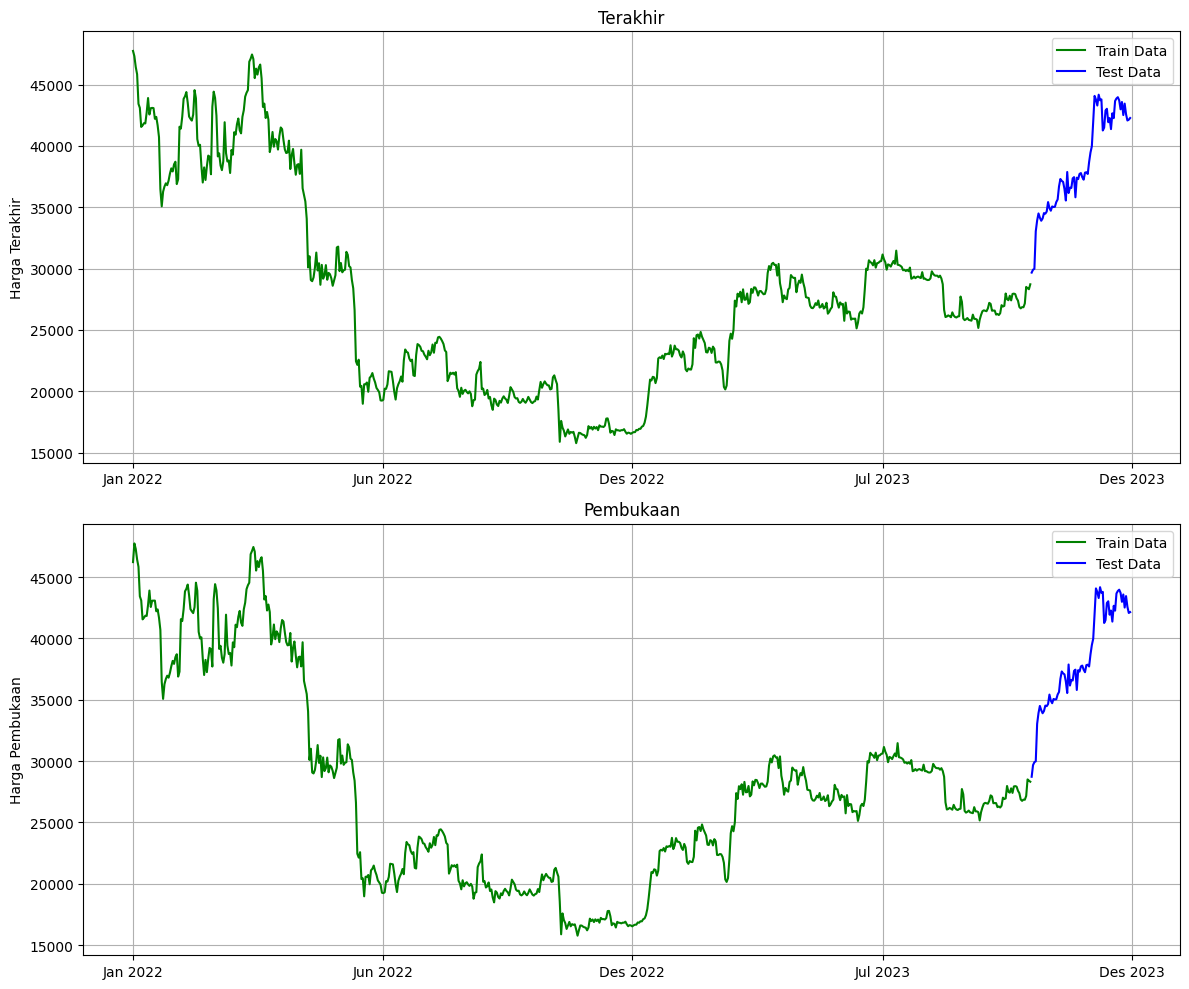

In [5]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
plt.grid(True)
plt.xticks([0, 183, 365, 548, 730], ['Jan 2022', 'Jun 2022', 'Des 2022', 'Jul 2023', 'Des 2023'])
plt.ylabel('Harga Terakhir')
plt.plot(df[0:to_row]['Terakhir'], 'green', label='Train Data')
plt.plot(df[to_row:]['Terakhir'], 'blue', label='Test Data')
plt.legend()
plt.title('Terakhir')

plt.subplot(2, 1, 2)
plt.grid(True)
plt.xticks([0, 183, 365, 548, 730], ['Jan 2022', 'Jun 2022', 'Des 2022', 'Jul 2023', 'Des 2023'])
plt.ylabel('Harga Pembukaan')
plt.plot(df[0:to_row]['Pembukaan'], 'green', label='Train Data')
plt.plot(df[to_row:]['Pembukaan'], 'blue', label='Test Data')
plt.legend()
plt.title('Pembukaan')

plt.tight_layout()
plt.show()

In [79]:
model = VAR(training_data)
model_fitted = model.fit(9, trend='ctt')

lag_order = model_fitted.k_ar
forecast_input = training_data.values[-lag_order:]
forecast_result = model_fitted.forecast(y=forecast_input, steps=len(testing_data))
forecast_df = pd.DataFrame(forecast_result, columns=['Terakhir_Forecast', 'Pembukaan_Forecast'])

print(forecast_df)

    Terakhir_Forecast  Pembukaan_Forecast
0        28783.784683        28722.449840
1        28891.833629        28783.341705
2        29106.687332        28891.130730
3        29224.247578        29105.688148
4        29327.374779        29222.983355
..                ...                 ...
68       38008.351065        37882.788782
69       38133.106260        38007.590792
70       38257.821101        38132.343038
71       38382.504651        38257.054908
72       38507.163185        38381.735464

[73 rows x 2 columns]


In [80]:
rmse_terakhir = math.sqrt(mean_squared_error(testing_data['Terakhir'], forecast_df['Terakhir_Forecast']))
print('RMSE Terakhir:', rmse_terakhir)

rmse_pembukaan = math.sqrt(mean_squared_error(testing_data['Pembukaan'], forecast_df['Pembukaan_Forecast']))
print('RMSE Pembukaan:', rmse_pembukaan)

RMSE Terakhir: 4968.234632335901
RMSE Pembukaan: 4949.473060044548


In [81]:
mae_terakhir = mean_absolute_error(testing_data['Terakhir'], forecast_df['Terakhir_Forecast'])
print('MAE Terakhir:', mae_terakhir)

mae_pembukaan = mean_absolute_error(testing_data['Pembukaan'], forecast_df['Pembukaan_Forecast'])
print('MAE Pembukaan:', mae_pembukaan)

MAE Terakhir: 4703.812529018463
MAE Pembukaan: 4653.102066081308


In [82]:
mape_terakhir = mean_absolute_percentage_error(testing_data['Terakhir'], forecast_df['Terakhir_Forecast'])
print('MAPE Terakhir:', mape_terakhir)

mape_pembukaan = mean_absolute_percentage_error(testing_data['Pembukaan'], forecast_df['Pembukaan_Forecast'])
print('MAPE Pembukaan:', mape_pembukaan)


MAPE Terakhir: 0.1199789610800381
MAPE Pembukaan: 0.11878084228750932


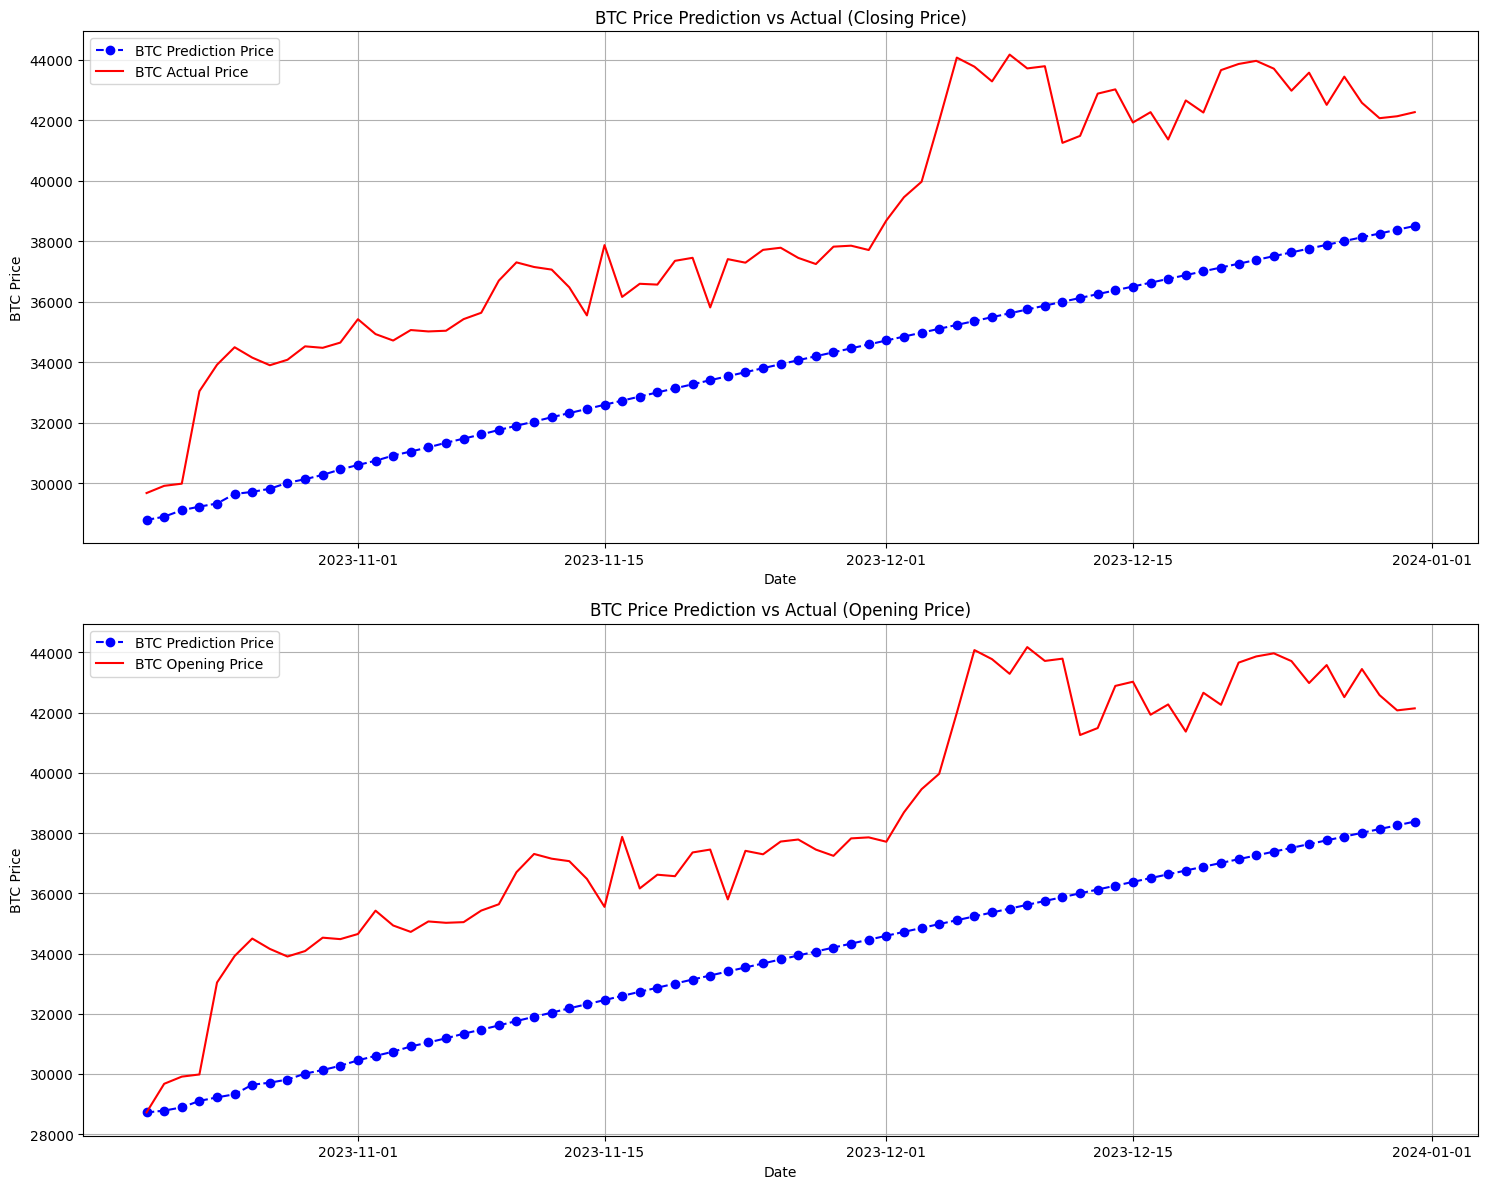

In [86]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 1)
plt.grid(True)
to_row = len(df) - len(testing_data)
date_range = df['Tanggal'][to_row:to_row+len(testing_data)]
plt.plot(date_range, forecast_df['Terakhir_Forecast'], color='blue', marker='o', linestyle='dashed', label='BTC Prediction Price')
plt.plot(date_range, testing_data['Terakhir'], color='red', label='BTC Actual Price')
plt.title('BTC Price Prediction vs Actual (Closing Price)')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.grid(True)
to_row = len(df) - len(testing_data)
date_range = df['Tanggal'][to_row:to_row+len(testing_data)]
plt.plot(date_range, forecast_df['Pembukaan_Forecast'], color='blue', marker='o', linestyle='dashed', label='BTC Prediction Price')
plt.plot(date_range, testing_data['Pembukaan'], color='red', label='BTC Opening Price')
plt.title('BTC Price Prediction vs Actual (Opening Price)')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend()

plt.tight_layout()
plt.show()